In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # normalize ให้ค่าอยู่ในช่วง -1 ถึง 1
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.12MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 248kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.24MB/s]


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.softmax =nn.Softmax()
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x,1)  # flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

model = Net().to(device)

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
for epoch in range(5):
    running_loss = 0.0
    for images, labels in trainloader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")

Epoch 1, Loss: 906.7963
Epoch 2, Loss: 348.8326
Epoch 3, Loss: 296.9883
Epoch 4, Loss: 265.7627
Epoch 5, Loss: 242.2863


In [6]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Accuracy on test set: 93.07%


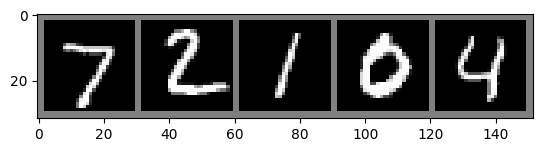

Predicted: [7, 2, 1, 0, 4]
Actual: [7, 2, 1, 0, 4]


In [7]:
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# แสดงภาพจาก test set พร้อม prediction
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:5]))
outputs = model(images[:5].to(device))
_, predicted = torch.max(outputs, 1)
print('Predicted:', predicted.tolist())
print('Actual:', labels[:5].tolist())